# Esercitazione 12
**13  Maggio 2025**

### Codice EquazioniNormali
Implementare la function  **eqnorm(A,b)** che implementa il metodo delle equazioni normali per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m times n$ $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare 

In [2]:
import numpy as np
import scipy.linalg as spLin
import matplotlib.pyplot as plt
from SolveTriangular import *

In [3]:
def eqnorm(A, b):
    G = A.T@A
    condG = np.linalg.cond(G)
    print("Condizionamento G ", condG)

    f = A.T@b

    L = spLin.cholesky(G, lower=True)
    U = L.T
    z, flag = Lsolve(L, f)
    if flag == 0:
        a, flag = Usolve(U, z)

    return a

In [4]:
x = np.array([-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3])
y = np.array([-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1])
n = 4 # Grado del polinomio di approssimazione nel senso dei minimi quadrati
n1 = n + 1 # Gradi di libertà di un polinomio di grado n
A = np.vander(x, increasing=True)[:, :n1]
print(A)

[[ 1.000000e+00 -3.500000e+00  1.225000e+01 -4.287500e+01  1.500625e+02]
 [ 1.000000e+00 -3.000000e+00  9.000000e+00 -2.700000e+01  8.100000e+01]
 [ 1.000000e+00 -2.000000e+00  4.000000e+00 -8.000000e+00  1.600000e+01]
 [ 1.000000e+00 -1.500000e+00  2.250000e+00 -3.375000e+00  5.062500e+00]
 [ 1.000000e+00 -5.000000e-01  2.500000e-01 -1.250000e-01  6.250000e-02]
 [ 1.000000e+00  5.000000e-01  2.500000e-01  1.250000e-01  6.250000e-02]
 [ 1.000000e+00  1.700000e+00  2.890000e+00  4.913000e+00  8.352100e+00]
 [ 1.000000e+00  2.500000e+00  6.250000e+00  1.562500e+01  3.906250e+01]
 [ 1.000000e+00  3.000000e+00  9.000000e+00  2.700000e+01  8.100000e+01]]


In [5]:
coeff_eqn = eqnorm(A, y)
print(coeff_eqn)

Condizionamento G  22958.71819463678
[[ 1.0358029 ]
 [ 2.20051095]
 [-0.15401867]
 [-0.02338904]
 [ 0.02300486]]


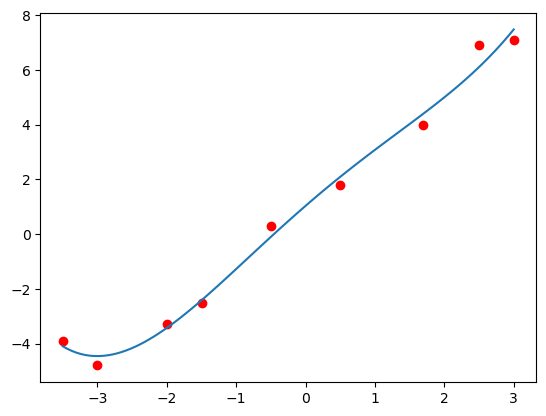

errore eqn  1.3679038603216647
y.shape  (9,)
aa.shape  (9, 1)


In [6]:
m = x.shape[0]
xv = np.linspace(np.min(x), np.max(x), 100)
pol_eqn = np.polyval(np.flip(coeff_eqn), xv)
plt.plot(x, y, 'ro', xv, pol_eqn)
plt.show()

errore_eqn = np.linalg.norm(A@coeff_eqn - y.reshape(m, 1))**2
aa = A@coeff_eqn
print("errore eqn ", errore_eqn)
print("y.shape ", y.shape)
print("aa.shape ", aa.shape)

### Codice QRLS
Implementare la function  **qrLS(A,b)** che utilizza il metodo QR per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m times n$ $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [7]:
def qrLS(A, b):
    Q, R = spLin.qr(A)
    h = Q.T@b
    m, n = R.shape
    h1 = h[:n].reshape(n, 1)
    h2 = h[n:].reshape(-n, 1)
    R1 = R[:n, ]
    x, flag = Usolve(R1, h1)
    
    return x

In [8]:
coeff_qr = qrLS(A, y)
print(coeff_qr)

[[ 1.0358029 ]
 [ 2.20051095]
 [-0.15401867]
 [-0.02338904]
 [ 0.02300486]]


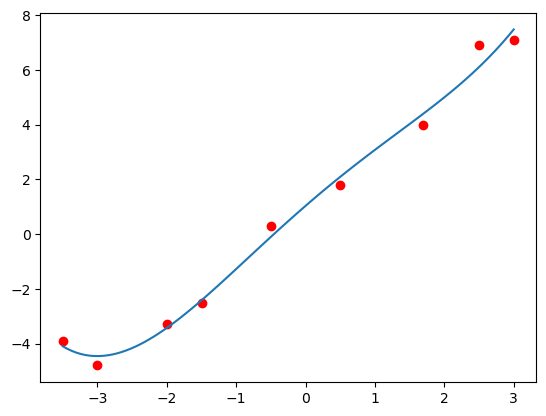

errore eqn  1.3679038603216631
y.shape  (9,)
aa.shape  (9, 1)


In [9]:
m = x.shape[0]
xv = np.linspace(np.min(x), np.max(x), 100)
pol_qr = np.polyval(np.flip(coeff_qr), xv)
plt.plot(x, y, 'ro', xv, pol_qr)
plt.show()

errore_qr = np.linalg.norm(A@coeff_qr - y.reshape(m, 1))**2
aa = A@coeff_qr
print("errore eqn ", errore_qr)
print("y.shape ", y.shape)
print("aa.shape ", aa.shape)

### Codice SVDLS
Implementare la function  **svdLS(A,b)** che utilizza  il metodo SVD per la soluzione del sistema sovradeterminato Ax=b e che prende in input:
- la matrice A di dimensione $m times n$ $m>n$
- il termine noto b di ordine m
restituisce in output
- la soluzione del sistema lineare e la norma 2 al quadrato del residuo.

In [10]:
def svdLS(A, b):
    m, n = A.shape
    U, s, VT = spLin.svd(A)
    V = VT.T
    thresh = np.spacing(1)*m*s[0]
    k = np.count_nonzero(s > thresh) # Il rango della matrice A
    d = U.T@b
    d1 = d[:k].reshape(k, 1)
    s1 = s[:k].reshape(k, 1)
    c = d1 / s1
    x = V[:, :k]@c
    residuo = np.linalg.norm(d[k:n])**2
    return x, residuo

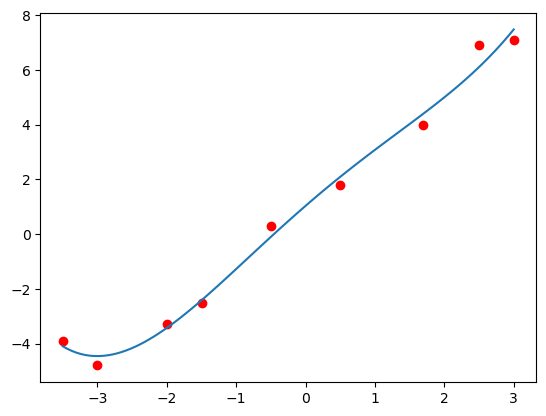

In [11]:
coeff_svd, res_svd = svdLS(A, y)
pol_svd = np.polyval(np.flip(coeff_svd), xv)
plt.plot(x, y, 'ro', xv, pol_svd)
plt.show()

## Esercizio 1
- Si utilizzino i tre metodi implementati  per l'approssimazione ai minimi quadrati delle seguenti configurazioni di dati:

$$
begin{array}{l}
x_1 = [-3.5, -3, -2, -1.5, -0.5, 0.5, 1.7, 2.5, 3] ;
y_1 = [-3.9, -4.8, -3.3, -2.5, 0.3, 1.8, 4, 6.9, 7.1] ;
x_2 = [-3.14, -2.4, -1.57, -0.7, -0.3, 0, 0.4, 0.7, 1.57] ;
y_2 = [0.02, -1, -0.9, -0.72, -0.2, -0.04, 0.65, 0.67, 1.1] ;
x_3 = [[1.001,, 1.004,, 1.005,,1.0012,1.0013,  1.0014,  1.0015, 1.0016] ;
y_3 = [-1.2, -0.95, -0.9, -1.15, -1.1, -1] ;
end{array}
$$

al variare del grado $n$ tra 1 e 4.



## Esercizio 2: 
Per i dati $(x_i, y_i)$ riportati nei seguenti array

$$
begin{array}{l}
x = [0.0004, 0.2507, 0.5008, 2.0007, 8.0013]  ;
y = [0.0007, 0.0162, 0.0288, 0.0309, 0.0310] ;
end{array}
$$

- costruire la retta di regressione;
- costruire la parabola approssimante i dati nel senso dei minimi quadrati;

Quale tra le due approssimazioni risulta la migliore? (Confrontare i grafici e la norma euclidea al quadrato del vettore dei residui).



### Codici per l'interpolazione polinomiale nella forma di Lagrange 

Scrivere la function **interpL** che calcoli
il polinomio interpolante in forma di Lagrange  
Tale function deve assumere come dati in input:
 
 - x vettore dei nodi di interpolazione,
- y vettore dei valori della funzione nei nodi di interpolazione,
- xx vettore dei punti in cui si vuole valutare il polinomio interpolante.
 
In output deve essere restituito yy vettore contenente i valori assunti dal polinomio interpolante.

 
Funzioni Python  utili:
 
-  numpy.poly() restituisce i coefficienti di un polinomio di zeri assegnati,
 - numpy.polyval(p, x)  valuta un polinomio in un punto assegnato.
 

In [12]:
a = np.poly([2, 3])
print(a)

[ 1. -5.  6.]


In [13]:
def plagr(xnodi, j):
    xzeri = np.zeros_like(xnodi)
    n = xnodi.size
    if j == 0:
        xzeri = xnodi[1:n]
    else:
        xzeri = np.append(xnodi[0:j], xnodi[j + 1:n])

    num = np.poly(xzeri)
    den = np.polyval(num, xnodi[j])
    p = num / den

    return p

In [14]:
def interpL(x, y, xv):
    n = x.size
    m = xv.size
    L = np.zeros((m, n))
    for j in range(n):
        p = plagr(x, j)
        L[:, j] = np.polyval(p, xv)

    pol = L@y
    return pol

## Esercizio 1

Realizzare uno script che calcoli nella forma di Lagrange i polinomi che
interpolano le funzioni test $sin(x)$ e $cos(x)$ nei punti $x_k = k pi/2$, con
$k = 0, 1, 2, 3, 4$. Visualizzare graficamente i polinomi ottenuti insieme
alle funzioni assegnate.

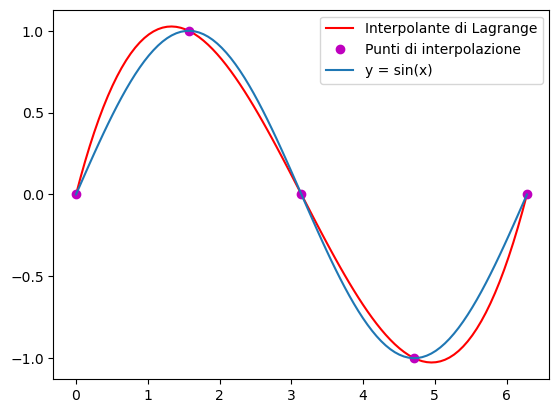

In [15]:
x1 = np.arange(0, 2 * np.pi+ 0.1, np.pi / 2)
y1 = np.sin(x1)
xv = np.linspace(np.min(x1), np.max(x1), 100)
polL1 = interpL(x1, y1, xv)
plt.plot(xv, polL1, 'r-', x1, y1, 'mo', xv, np.sin(xv))
plt.legend(['Interpolante di Lagrange', 'Punti di interpolazione', 'y = sin(x)'])
plt.show()

## Esercizio 2
Realizzare uno script python che interpola le coppie $x_i,y_i$, $i=0,cdots,3$
dove $x_i,i=0,3$ sono punti equidistanti nell' intervallo [-1,1] e $y_i=f(x_i)$ dove $f(x)=3x^3+2x^2+2x-1$ 

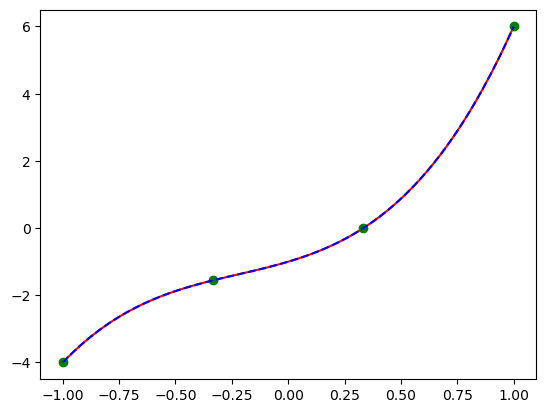

In [16]:
f = lambda x: 3 * x**3 + 2 * x**2 + 2 * x - 1
x2 = np.linspace(-1, 1, 4)
y2 = f(x2)
xv2 = np.linspace(-1, 1, 100)
polL2 = interpL(x2, y2, xv2)
plt.plot(xv2, polL2, 'r-', x2, y2, 'go', xv2, f(xv2), 'b--')
plt.show()

## Esercizio 3

La temperatura $T$ in  prossimità  del suolo  subisce una variazione dipendente dalla latitudine $L$ nel seguente modo

L=np.array([-55, -45, -35, -25, -15, -5, 5, 15, 25, 35, 45, 55, 65])

T=np.array([3.7, 3.7,3.52,3.27, 3.2, 3.15, 3.15, 3.25, 3.47, 3.52, 3.65, 3.67, 3.52])


 
- Si vuole costruire un modello che descriva la legge $T = T(L)$ anche per latitudini non misurate. A tal fine si scriva uno script che fornisca la variazione di temperatura alle latitudini $L = pm 42$ utilizzando il polinomio interpolante. Visualizzare in un grafico i dati assegnati, il polinomio interpolante e le stime di $T$ ottenute per $L = pm 42$.


## Esercizio 4 

Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange con $x_i$ scelti dall'utente come:
    - punti equidistanti in un intervallo $[a, b]$,
    - punti definiti dai nodi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = frac{(a + b)}{2}+frac{(b-a)}{2} cos left(
frac{(2i+1)pi}{2(n + 1)}
right), quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ di una funzione test   $f:  [a, b] rightarrow {mathbb R}$. Testare lo script sulle funzioni
 
  - $f(x) = sin(x)-2 sin(2x)$,   $ quad x in [-pi,pi]$,
  -  $f(x) = sinh(x)$, $ quad  x in [-2, 2]$,
  - $f(x) = |x|$,  $ quad x in [-1, 1]$,
  - $f(x) = 1/(1+25*x^2)$,  $ quad x in [-1, 1]$ (funzione di Runge).

Calcolare l'errore di interpolazione $r(x) = f(x)-p(x)$,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$.
Visualizzare il grafico di $f(x)$ e $p(x)$, ed il grafico di
$|r(x)|$. Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$?
(Si costruisca una tabella che riporti i valori di $|r(x)|_{infty}$ al variare di $n$).

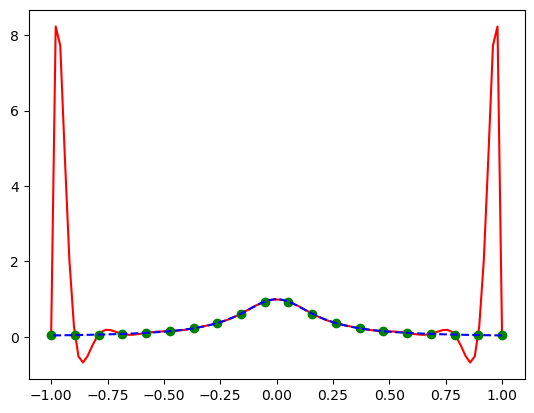

In [53]:
f4 = lambda x: 1 / (1.0 + 25 * x**2)
n = 19
x4 = np.linspace(-1, 1, n + 1)
y4 = f4(x4)
xv4 = np.linspace(1, -1, 100)
polL4 = interpL(x4, y4, xv4)
plt.plot(xv4, polL4, 'r-', x4, y4, 'go', xv4, f4(xv4), 'b--')
plt.show()

In [54]:
def zeri_cheb(a, b, n):
    t1 = (a + b) / 2
    t2 = (b - a) / 2
    x = np.zeros((n + 1,))
    for i in range(n + 1):
        x[i] = t1 + t2 * np.cos(((2 * i + 1) / (2 * (n + 1)) * np.pi))
    return x

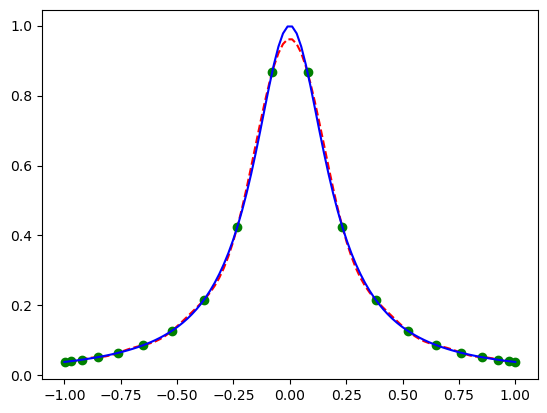

In [55]:
x4c = zeri_cheb(-1, 1, n)
y4c = f4(x4c)
pol_cheb = interpL(x4c, y4c, xv4)
plt.plot(xv4, pol_cheb, 'r--', x4c, y4c, 'go', xv4, f4(xv4), 'b-')
plt.show()

## Esercizio 5

Per $n = 5, 10, 15, 20$ fornire un'approssimazione della costante di Lebesgue
scegliendo $x_1, x_2, ..., x_{n+1}$ equispaziati in $[-1, 1]$ oppure coincidenti con
i nodi di Chebyshev $x_i = cos left(frac{(2i-1)pi}{2(n + 1)}  right)$, $i =1, ..., n + 1$.

In [60]:
n5 = 19
x5 = np.linspace(-1, 1, n5 + 1)
xv5 = np.linspace(-1, 1, 100)
L = np.zeros((100, 1))
for i in range(n5 + 1):
    p = plagr(x5, i)
    L = L + np.abs(np.polyval(p, xv5))
cost_leb = np.max(L)
print("Costante di Lebesgue", cost_leb)

Costante di Lebesgue 5652.8087078219405


## Esercizio 6

Si interpolino mediante il polinomio $p_{21}(x)$ i 22 punti $(x_i, y_i)$ con $x_i$ equispaziati in $[-1, 1]$ e $y_i = sin(2 pi x_i)$. Si considerino poi le ordinate $tilde{y}_i = y_i + varepsilon_i$, dove $varepsilon_i$ denota l'$i$-esima componente del vettore $0.0002*np.random.random(22,)$, e si calcoli il corrispondente
polinomio interpolante $tilde{p}_{21}(x)$. Si visualizzino e si commentino
i risultati ottenuti, calcolando anche l'errore relativo sul polinomio interpolante
e sui dati.
